<a href="https://colab.research.google.com/github/ElinaZ7/AH2179_ElinaZhang/blob/main/Hand_In_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hand in Assignment 2: Using the text classification model for traffic sentiment analysis
Elina Zhang AH2179


In [1]:
# Imports
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay as cmd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'
df = pd.read_csv(url)

# Remove duplicates
df = df.drop_duplicates()

In [3]:
# Separate features and labels
X = df['Text']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define vectorizers
vectorizers = {
    'CountVectorizer': CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20),
    'TfidfVectorizer': TfidfVectorizer(min_df=20, norm='l2', smooth_idf=True, use_idf=True, ngram_range=(1, 2), stop_words='english'),
    'HashingVectorizer': HashingVectorizer(ngram_range=(1, 2), n_features=200)
}

In [5]:
# Define models and their hyperparameters
models = {
    'LogisticRegression': (LogisticRegression(max_iter=1000, random_state=0), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'SVM': (SVC(probability=True), {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}),
    'RandomForest': (RandomForestClassifier(random_state=0), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'XGBoost': (XGBClassifier(), {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200], 'max_depth': [3, 4, 5]})
}

In [6]:
# Store the best results
best_results = {'vectorizer': None, 'model': None, 'best_params': None, 'best_accuracy': 0}


Vectorizer: CountVectorizer
Testing model: LogisticRegression
Model: LogisticRegression, Best Params: {'C': 100}, Accuracy: 0.9545454545454546


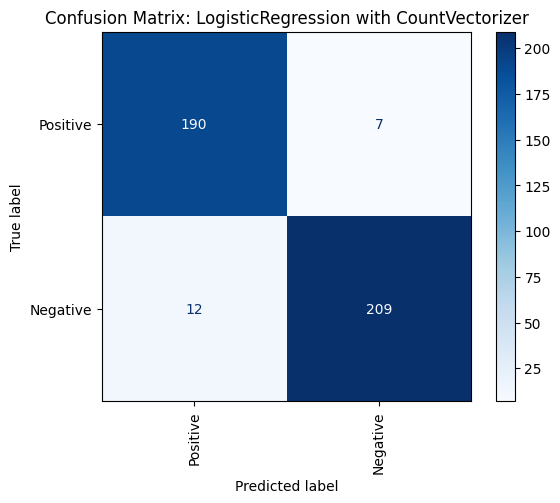

Testing model: SVM
Model: SVM, Best Params: {'C': 10, 'kernel': 'rbf'}, Accuracy: 0.9497607655502392


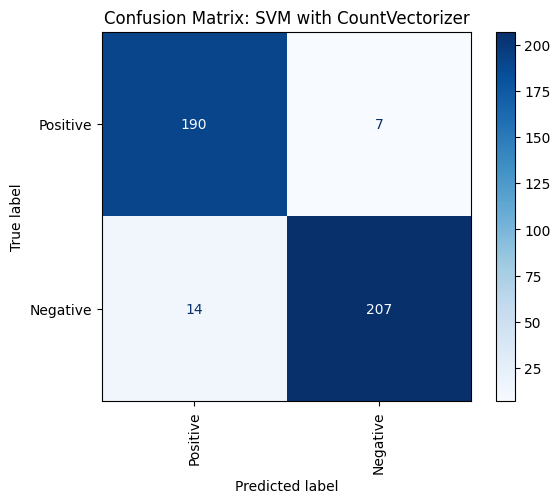

Testing model: RandomForest
Model: RandomForest, Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}, Accuracy: 0.9473684210526315


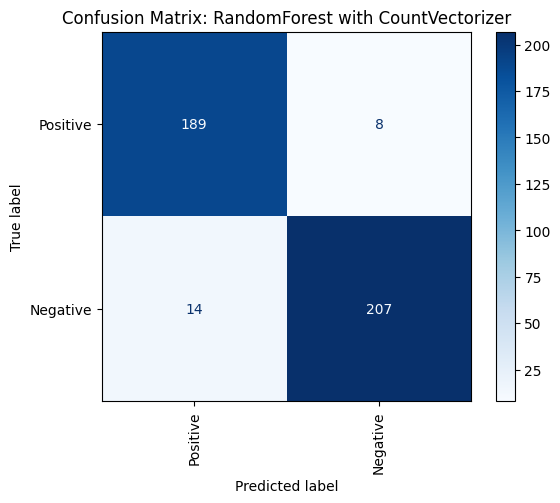

Testing model: KNN
Model: KNN, Best Params: {'n_neighbors': 3, 'weights': 'distance'}, Accuracy: 0.9330143540669856


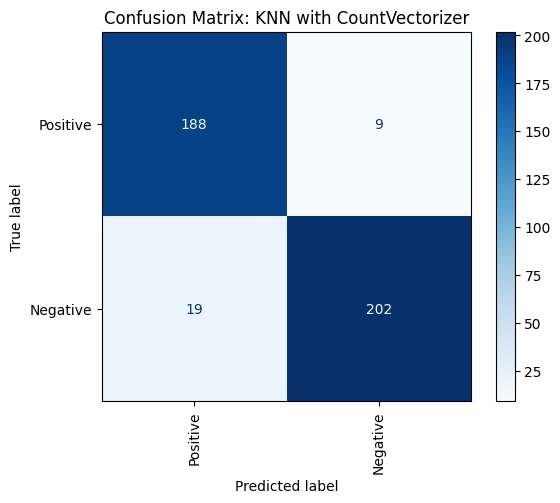

Testing model: XGBoost
Model: XGBoost, Best Params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}, Accuracy: 0.937799043062201


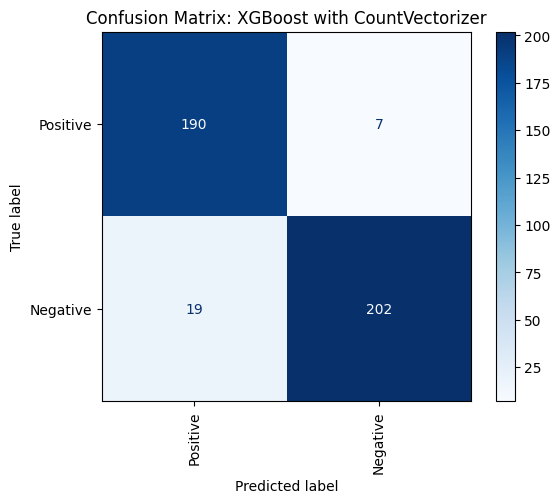


Vectorizer: TfidfVectorizer
Testing model: LogisticRegression
Model: LogisticRegression, Best Params: {'C': 1}, Accuracy: 0.9545454545454546


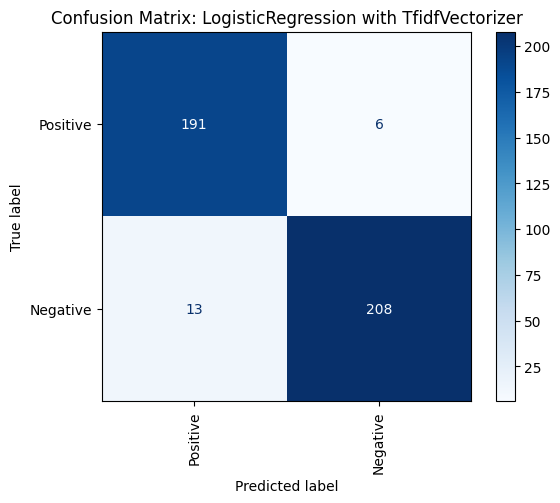

Testing model: SVM
Model: SVM, Best Params: {'C': 10, 'kernel': 'rbf'}, Accuracy: 0.9497607655502392


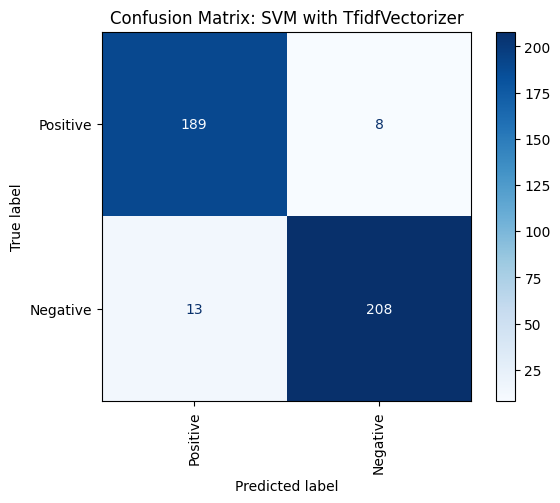

Testing model: RandomForest
Model: RandomForest, Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}, Accuracy: 0.9545454545454546


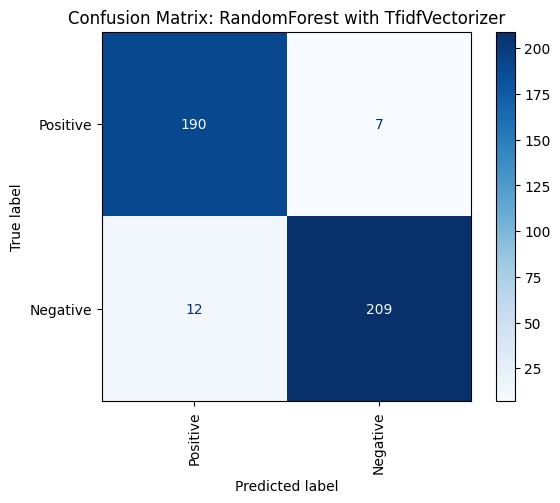

Testing model: KNN
Model: KNN, Best Params: {'n_neighbors': 5, 'weights': 'distance'}, Accuracy: 0.9330143540669856


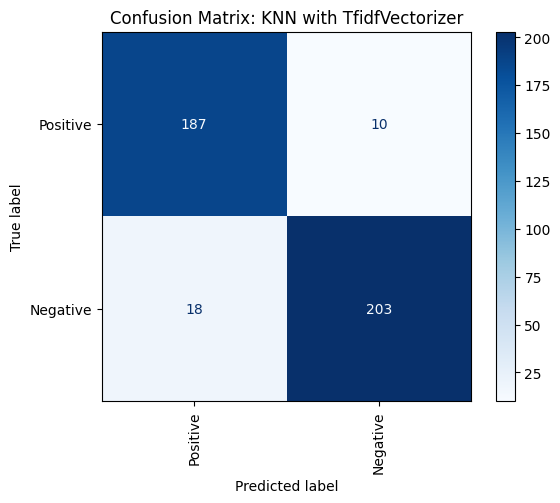

Testing model: XGBoost
Model: XGBoost, Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}, Accuracy: 0.9473684210526315


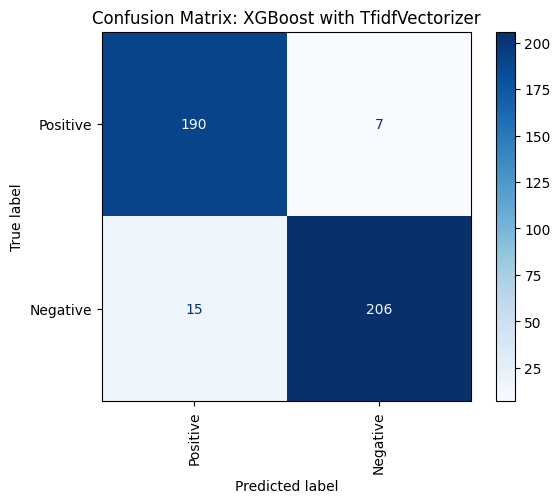


Vectorizer: HashingVectorizer
Testing model: LogisticRegression
Model: LogisticRegression, Best Params: {'C': 1}, Accuracy: 0.9497607655502392


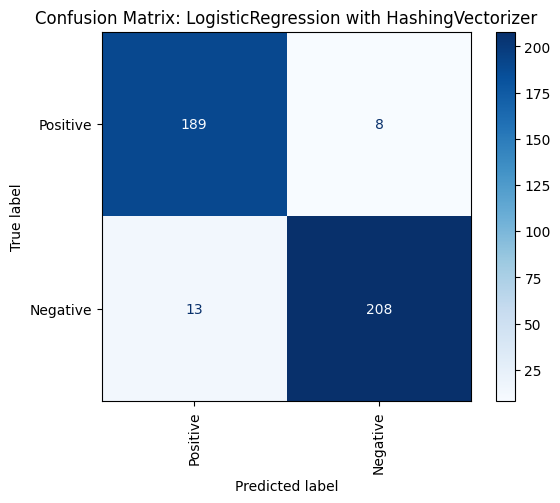

Testing model: SVM
Model: SVM, Best Params: {'C': 10, 'kernel': 'rbf'}, Accuracy: 0.9736842105263158


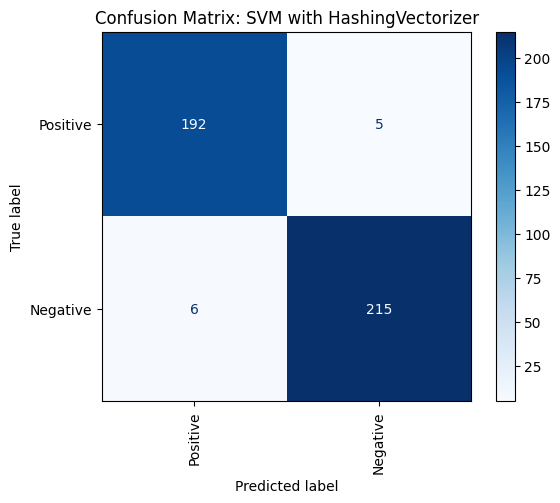

Testing model: RandomForest
Model: RandomForest, Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}, Accuracy: 0.9832535885167464


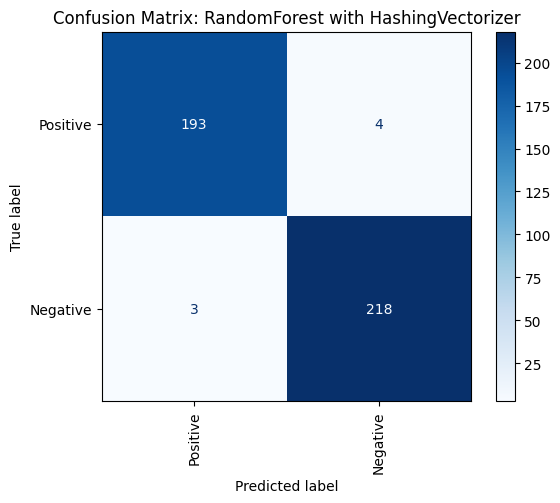

Testing model: KNN
Model: KNN, Best Params: {'n_neighbors': 7, 'weights': 'uniform'}, Accuracy: 0.9521531100478469


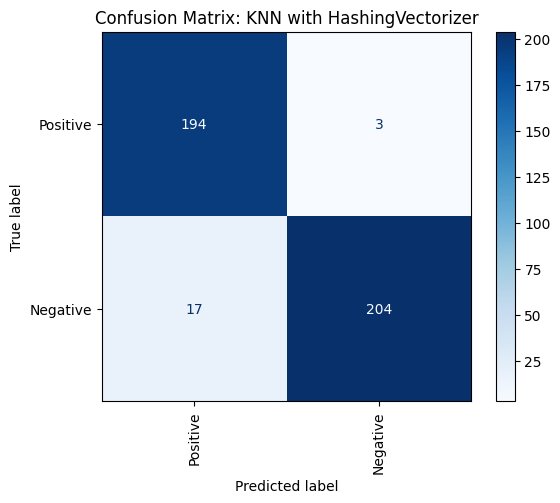

Testing model: XGBoost
Model: XGBoost, Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}, Accuracy: 0.9760765550239234


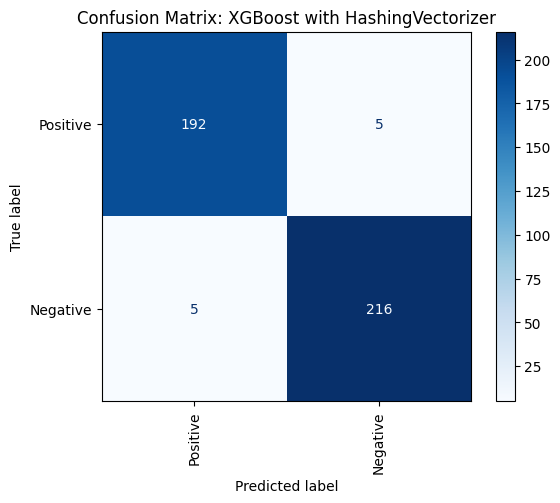

In [7]:
# Loop through vectorizers and models
for vec_name, vectorizer in vectorizers.items():
    # Vectorize the text
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    print(f'\nVectorizer: {vec_name}')

    for model_name, (model, param_grid) in models.items():
        print(f'Testing model: {model_name}')

        # Perform grid search with cross-validation
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_vect, y_train)

        # Get the best estimator and evaluate
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_vect)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Model: {model_name}, Best Params: {grid_search.best_params_}, Accuracy: {accuracy}")

        # Store the best model and its parameters
        if accuracy > best_results['best_accuracy']:
            best_results['vectorizer'] = vec_name
            best_results['model'] = model_name
            best_results['best_params'] = grid_search.best_params_
            best_results['best_accuracy'] = accuracy

        # Display the confusion matrix
        cmd.from_estimator(best_model, X_test_vect, y_test, display_labels=['Positive', 'Negative'], cmap='Blues', xticks_rotation='vertical')
        plt.title(f'Confusion Matrix: {model_name} with {vec_name}')
        plt.show()

In [8]:
# Print out the best result
print(f"\nBest Model: {best_results['model']}")
print(f"Best Vectorizer: {best_results['vectorizer']}")
print(f"Best Parameters: {best_results['best_params']}")
print(f"Best Accuracy: {best_results['best_accuracy']}")


Best Model: RandomForest
Best Vectorizer: HashingVectorizer
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.9832535885167464
